In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
print('Dataset shape: ', df.shape)
print('Head of dataset...')
print(df.head())

Dataset shape:  (768, 9)
Head of dataset...
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print('DataFrame info...\n')
print(df.info())
print('\n-------------------------------------\n')
print('DataFrame description summary...\n')
print(df.describe())

DataFrame info...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

-------------------------------------

DataFrame description summary...

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.

In [ ]:
df.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:
print('Duplicate rows...\n')
df[df.duplicated()]
print('Dropping duplicates...')
df = df.drop_duplicates()

Duplicate rows...

Dropping duplicates...


In [ ]:
from sklearn.preprocessing import MinMaxScaler

print('Normalizing with MinMax Scaler from sklearn...\n')
scaler = MinMaxScaler(feature_range= (0,1))
normalized_df = scaler.fit_transform(df)
print('Head of normalized Data Features...')
print(normalized_df[:5])
normalized_df[0]

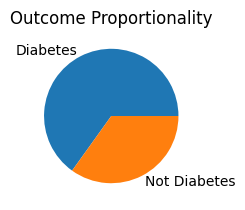

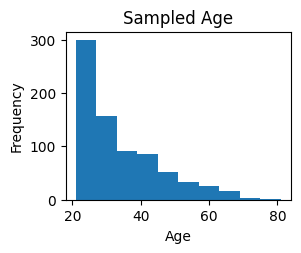

In [ ]:
plt.subplot(2, 2, 1)
plt.pie(df.Outcome.value_counts(), labels= ['Diabetes', 'Not Diabetes'])
plt.title('Outcome Proportionality')
plt.show()

plt.subplot(2, 2, 2)
plt.hist(df.Age)
plt.title('Sampled Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Decision_Tree': DecisionTreeClassifier(),
    'Logistic_Regression': LogisticRegression(),
    'Random_Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(name + ' Accuracy :' + str(round(accuracy_score(y_test, y_pred), 2)))
    print(name + ' Precision :' + str(round(precision_score(y_test, y_pred, average='weighted'), 2)))
    print(name + ' Recall :' + str(round(recall_score(y_test, y_pred, average='weighted'), 2)))

Decision_Tree Accuracy :0.72
Decision_Tree Precision :0.73
Decision_Tree Recall :0.72
Logistic_Regression Accuracy :0.78
Logistic_Regression Precision :0.77
Logistic_Regression Recall :0.78
Random_Forest Accuracy :0.77
Random_Forest Precision :0.77
Random_Forest Recall :0.77


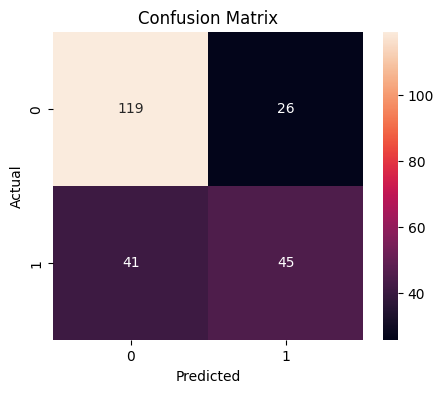

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()